In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading data from the csv file into a pandas dataframe

df = pd.read_csv("aerofit_treadmill.csv")

# Usual data analysis

In [4]:
# displaying data

df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
# Checking dataframe shape

df.shape

(180, 9)

In [6]:
# checking data types of each columns and possible existence of null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
# Explicitely checking if there are any null values in any column

df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [8]:
# Checking if there are any empty values in any of the columns

(df == '').sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [9]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [10]:
# Unique no. of product that aerofit provides

df["Product"].nunique()

3

In [11]:
# Unique product names

df["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [13]:
# Count of each product listed in the dataset

df["Product"].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [14]:
# From the product portfolio, we know that...
# The KP281 is an entry-level treadmill that sells for $1,500.
# The KP481 is for mid-level runners that sell for $1,750.
# The KP781 treadmill has advanced features that sell for $2,500

In [18]:
# Adding each treadmill cost against them in the dataframe, for possible correlation.

def treadmill_cost(row):
    if row["Product"] == "KP281":
        return 1500
    elif row["Product"] == "KP481":
        return 1750
    else:
        return 2500

In [22]:
df["treadmill_cost"] = df.apply(treadmill_cost, axis=1)

In [23]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,treadmill_cost
0,KP281,18,Male,14,Single,3,4,29562,112,1500
1,KP281,19,Male,15,Single,2,3,31836,75,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500
3,KP281,19,Male,12,Single,3,3,32973,85,1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500


In [27]:
df.shape

(180, 10)

In [28]:
# cost of treadmill column added successfully

In [30]:
# what is ratio of male and female

df["Gender"].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

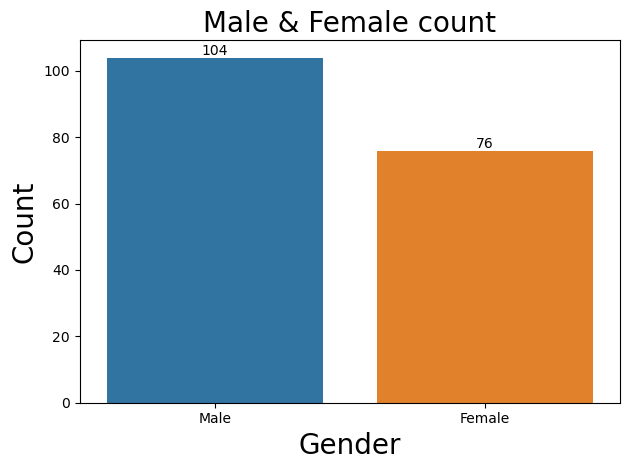

In [101]:
ax = sns.barplot(data=df["Gender"].value_counts().to_frame().reset_index(),
           x="Gender", y="count")

plt.title("Male & Female count", fontsize=20)
plt.xlabel("Gender", fontsize=20)
plt.ylabel("Count", fontsize=20)

for i in ax.containers:
    ax.bar_label(i,)

plt.tight_layout()
plt.show()

In [31]:
# More males opt for treadmills as compared to females.

In [38]:
# gender wise age group

df.groupby("Gender").agg({"Age":("min","max")})

Age    
       min max
Gender        
Female  19  50
Male    18  48

In [39]:
# It can be inferred that people b/w age group of 18-50 opt for treadmill, irrespective of the gender

In [40]:
# Product wise income group
# this is to infer if the income of the person affects the cost of the treadmill he or she will opt for?

df.groupby(["Product", "treadmill_cost"]).agg({"Income":("min","max")})

Income        
                          min     max
Product treadmill_cost               
KP281   1500            29562   68220
KP481   1750            31836   67083
KP781   2500            48556  104581

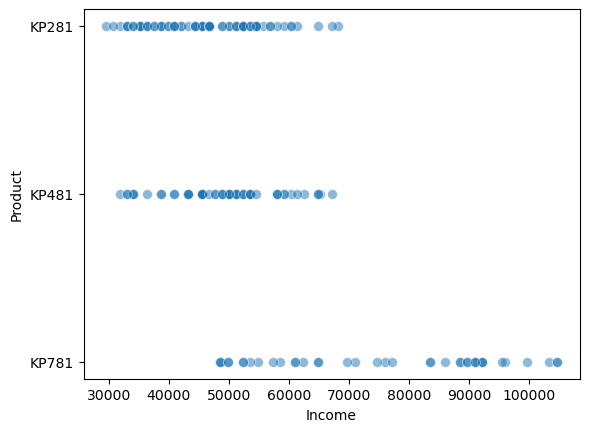

In [363]:
sns.scatterplot(data=df, x="Income", y="Product", s=50, alpha=0.5)
plt.show()

In [41]:
# There is technically no difference in the customer's income who choose between KP281 & KP481 treadmills.
# Although people with higher income does prefer more expensive KP781 treadmill.

In [42]:
df["Usage"].min(), df["Usage"].max()

(2, 7)

In [43]:
df["Miles"].min(), df["Miles"].max()

(21, 360)

In [44]:
df["MaritalStatus"].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [45]:
# People having partners (married people) tend to align to treadmill more than singles.

In [51]:
# Count of people with their corresponding marital status for each type of treadmill

temp = df.groupby(["Product", "treadmill_cost", "MaritalStatus"]).size().reset_index(name='Count')
temp

,Product,treadmill_cost,MaritalStatus,Count
0,KP281,1500,Partnered,48
1,KP281,1500,Single,32
2,KP481,1750,Partnered,36
3,KP481,1750,Single,24
4,KP781,2500,Partnered,23
5,KP781,2500,Single,17


In [86]:
# Married people opt for treadmill more than singles, irrespective of the treadmill cost

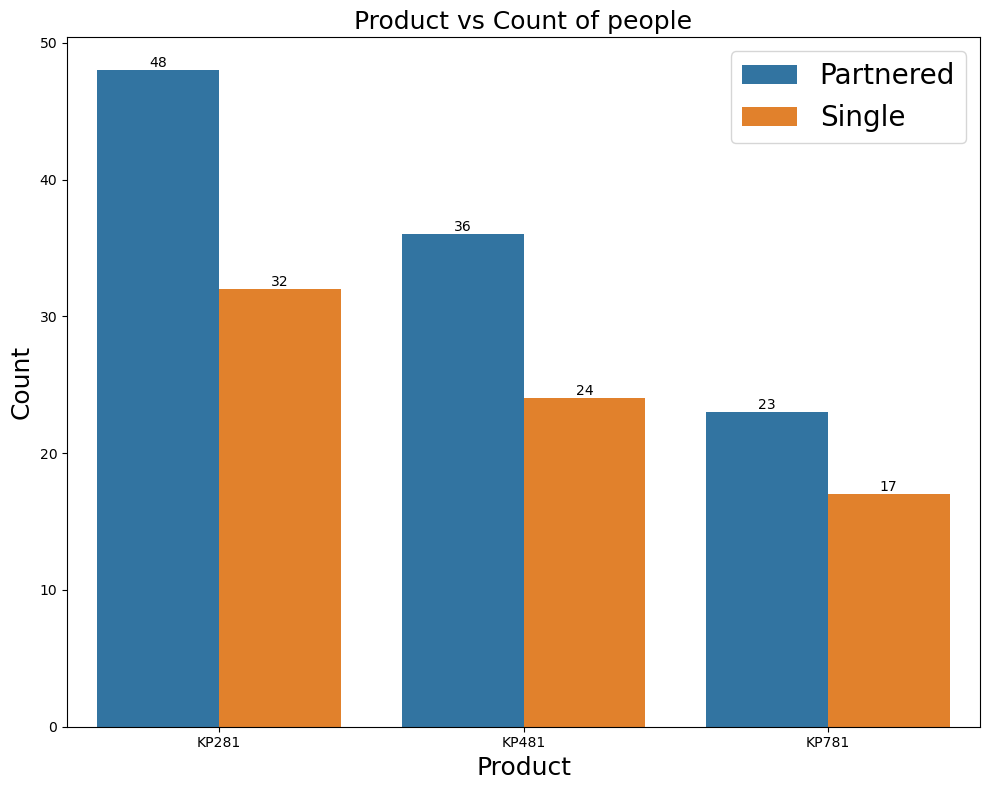

In [107]:
# Visuallising the same with a bar plot

plt.figure(figsize=(10, 8))

ax = sns.barplot(data=temp, x="Product", y="Count", hue="MaritalStatus")

plt.title("Product vs Count of people", fontsize=18)
plt.xlabel("Product", fontsize=18)
plt.ylabel("Count", fontsize=18)

# To write the value of each bar height on top it
for i in ax.containers:
    ax.bar_label(i,)

plt.legend(fontsize=20)
plt.tight_layout()

# plt.savefig("Product vs Count of people.png")
plt.show()

In [103]:
# Count of people of each fitness ranking for each treadmill type

df_fitness = df.groupby(["Product", "treadmill_cost", "Fitness"]).size().reset_index(name='Count')

In [104]:
df_fitness

,Product,treadmill_cost,Fitness,Count
0,KP281,1500,1,1
1,KP281,1500,2,14
2,KP281,1500,3,54
3,KP281,1500,4,9
4,KP281,1500,5,2
5,KP481,1750,1,1
6,KP481,1750,2,12
7,KP481,1750,3,39
8,KP481,1750,4,8
9,KP781,2500,3,4


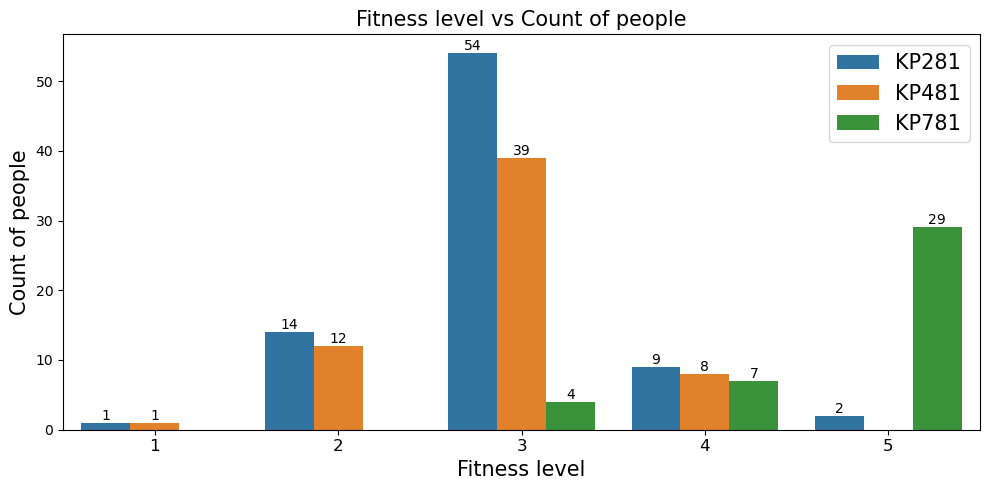

In [120]:
# Visuallising the same
plt.figure(figsize=(10, 5))

ax = sns.barplot(data=df_fitness, x="Fitness", y="Count", hue="Product")

for i in ax.containers:
    ax.bar_label(i)

plt.title("Fitness level vs Count of people", fontsize=15)
plt.xlabel("Fitness level", fontsize=15)
plt.ylabel("Count of people", fontsize=15)
plt.xticks(fontsize=12)
plt.legend(fontsize=15)

plt.tight_layout()
plt.show()

In [122]:
# From the graph it can be inferred that:
#     The most fit people (level 5) choose to prefer more expensive treadmill. 
#     This could be due a psychological factor as well that costly the product better the quality it will have, 
#     hence better result

# People with moderate fitness, tend to choose cheapest treadmill more compared to expensive one:
#     Maybe they prioritise on maintaining their current fitness and the cheapest treadmill will do just fine.

In [123]:
# Also most no. of people are of fitness level 3 (Moderately fit)

# Detecting ouliers, if any

In [124]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,treadmill_cost
0,KP281,18,Male,14,Single,3,4,29562,112,1500
1,KP281,19,Male,15,Single,2,3,31836,75,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500
3,KP281,19,Male,12,Single,3,3,32973,85,1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product         180 non-null    object
 1   Age             180 non-null    int64 
 2   Gender          180 non-null    object
 3   Education       180 non-null    int64 
 4   MaritalStatus   180 non-null    object
 5   Usage           180 non-null    int64 
 6   Fitness         180 non-null    int64 
 7   Income          180 non-null    int64 
 8   Miles           180 non-null    int64 
 9   treadmill_cost  180 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 14.2+ KB


In [127]:
# Outliers can be detected for numerical & continuous columns.

### Age

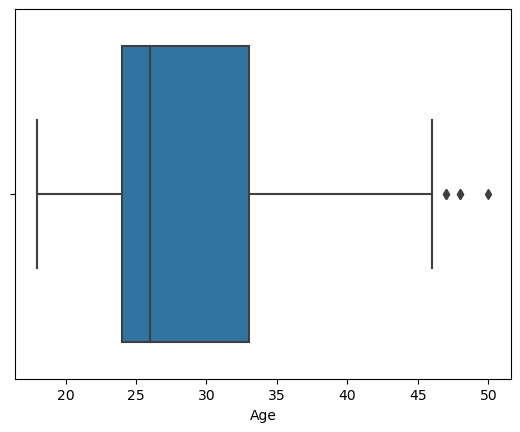

In [129]:
sns.boxplot(data=df, x="Age")
plt.show()

In [130]:
df["Age"].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

In [134]:
q1_age = np.percentile(df["Age"], 25)
q1_age

24.0

In [135]:
q3_age = np.percentile(df["Age"], 75)
q3_age

33.0

In [133]:
# since this is age, all the outliers will be on upper limit side, as age can't be negative

In [137]:
# Inter quartile range

iqr_age = q3_age - q1_age
iqr_age

9.0

In [138]:
range_age = df["Age"].max() - df["Age"].min()
range_age

32

In [139]:
# there is a huge difference in the actual range in interquartile range.
# This is due to the presence of outliers.

In [140]:
# finding outliers

In [141]:
upper_lim_age = q3_age + 1.5*iqr_age
upper_lim_age

46.5

In [160]:
# List of ages which are outliers

outliers_age = df[df["Age"] > upper_lim_age]["Age"].unique()
outliers_age

array([47, 50, 48])

### Education

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product         180 non-null    object
 1   Age             180 non-null    int64 
 2   Gender          180 non-null    object
 3   Education       180 non-null    int64 
 4   MaritalStatus   180 non-null    object
 5   Usage           180 non-null    int64 
 6   Fitness         180 non-null    int64 
 7   Income          180 non-null    int64 
 8   Miles           180 non-null    int64 
 9   treadmill_cost  180 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 14.2+ KB


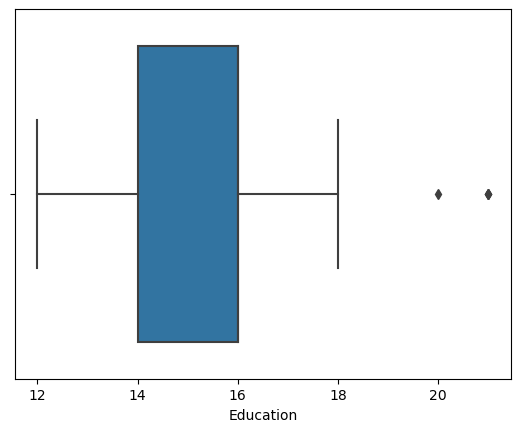

In [150]:
sns.boxplot(data=df, x="Education")
plt.show()

In [151]:
# Education can have outliers both lower and upper sides.
# Although from the box plot it can be clearly inferred that education has only upper limit outliers.

In [152]:
# Let's find those outliers

In [153]:
df["Education"].describe()

count    180.000000
mean      15.572222
std        1.617055
min       12.000000
25%       14.000000
50%       16.000000
75%       16.000000
max       21.000000
Name: Education, dtype: float64

In [155]:
q1_edu = np.percentile(df["Education"], 25)
q3_edu = np.percentile(df["Education"], 75)

q1_edu, q3_edu

(14.0, 16.0)

In [156]:
# interquartile range

iqr_edu = q3_edu - q1_edu
iqr_edu

2.0

In [162]:
# normal range

df["Education"].max() - df["Education"].min()

9

In [157]:
# lower and upper limit

lower_lim_edu = q1_edu - 1.5 * iqr_edu
upper_lim_edu = q3_edu + 1.5 * iqr_edu

lower_lim_edu, upper_lim_edu

(11.0, 19.0)

In [158]:
# since the lower limit is less than minimum value, there are no lower limit outliers
# since the upper limit is less than maximum value, there are upper limit outliers

# Same can be inferred from the box plot as well

In [161]:
# finding outliers

outliers_edu = df[df["Education"] > upper_lim_edu]["Education"].unique()
outliers_edu

array([20, 21])

### Usage

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product         180 non-null    object
 1   Age             180 non-null    int64 
 2   Gender          180 non-null    object
 3   Education       180 non-null    int64 
 4   MaritalStatus   180 non-null    object
 5   Usage           180 non-null    int64 
 6   Fitness         180 non-null    int64 
 7   Income          180 non-null    int64 
 8   Miles           180 non-null    int64 
 9   treadmill_cost  180 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 14.2+ KB


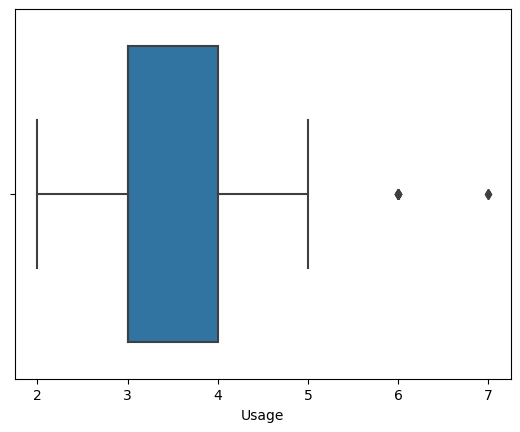

In [164]:
sns.boxplot(data=df, x="Usage")
plt.show()

In [165]:
# From the boxplot it is inferred that usage has only upper limit outliers

In [166]:
# Let's verify the same and find those outliers numerically

In [167]:
df["Usage"].describe()

count    180.000000
mean       3.455556
std        1.084797
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: Usage, dtype: float64

In [168]:
# Q1 = 3 & Q3 = 4

q1_usage = np.percentile(df["Usage"], 25)
q3_usage = np.percentile(df["Usage"], 75)

q1_usage, q3_usage

(3.0, 4.0)

In [169]:
# Interquartile range

iqr_usage = q3_usage - q1_usage
iqr_usage

1.0

In [170]:
# Normal range = max - min

df["Usage"].max() - df["Usage"].min()

5

In [171]:
# Normal range is far greater than IQR
# This is due to presence of outliers

In [172]:
# Lower and upper limit of box plot

lower_lim_usage = q1_usage - 1.5 * iqr_usage
upper_lim_usage = q3_usage + 1.5 * iqr_usage

lower_lim_usage, upper_lim_usage

(1.5, 5.5)

In [173]:
# since lower limit is less than minimum value, i.e. 2, there are no lower limit outliers
# since upper limit is less than maximum values i.e. 7, there are upper limit outliers.
# The same fact was inferred from the box plot above.

In [174]:
# Fiding the outliers in usage column

outliers_usage = df[df["Usage"] > upper_lim_usage]["Usage"].unique()
outliers_usage

array([6, 7])

In [176]:
df[df["Usage"] > upper_lim_usage]["Usage"].to_numpy()

array([6, 6, 6, 7, 6, 7, 6, 6, 6])

In [177]:
len(df[df["Usage"] > upper_lim_usage]["Usage"].to_numpy())

9

In [178]:
# there are total 9 data points which are outliers in the usage column
# with only 2 of them being unique.

### Income

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product         180 non-null    object
 1   Age             180 non-null    int64 
 2   Gender          180 non-null    object
 3   Education       180 non-null    int64 
 4   MaritalStatus   180 non-null    object
 5   Usage           180 non-null    int64 
 6   Fitness         180 non-null    int64 
 7   Income          180 non-null    int64 
 8   Miles           180 non-null    int64 
 9   treadmill_cost  180 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 14.2+ KB


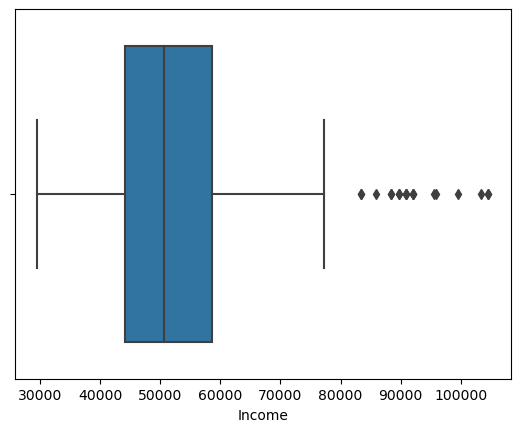

In [180]:
sns.boxplot(data=df, x="Income")
plt.show()

In [181]:
# Finding outliers

In [182]:
df["Income"].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [183]:
q1_income = np.percentile(df["Income"], 25)
q3_income = np.percentile(df["Income"], 75)

q1_income, q3_income

(44058.75, 58668.0)

In [184]:
# Interquartile range

iqr_income = q3_income - q1_income
iqr_income

14609.25

In [185]:
# normal range

df["Income"].max() - df["Income"].min()

75019

In [186]:
# there is a huge difference between normal range and IQR.
# this is due to the presence of outliers.

In [187]:
# upper and lower limit of box plot

lower_lim_income = q1_income - 1.5 * iqr_income
upper_lim_income = q3_income + 1.5 * iqr_income

lower_lim_income, upper_lim_income

(22144.875, 80581.875)

In [188]:
# since lower_lim_income < minimum value, there are no lower limit outliers
# Since upper_lim_income < maximum value, there are upper limit outliers

In [190]:
outliers_income = df[df["Income"] > upper_lim_income]["Income"].to_numpy()
outliers_income

array([ 83416,  88396,  90886,  92131,  88396,  85906,  90886, 103336,
        99601,  89641,  95866,  92131,  92131, 104581,  83416,  89641,
        90886, 104581,  95508])

In [191]:
len(outliers_income)

19

In [192]:
df[df["Income"] > upper_lim_income]["Income"].nunique()

11

In [193]:
# There are total 19 outliers data points. 
# 11 or those are unique values.

### Miles

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product         180 non-null    object
 1   Age             180 non-null    int64 
 2   Gender          180 non-null    object
 3   Education       180 non-null    int64 
 4   MaritalStatus   180 non-null    object
 5   Usage           180 non-null    int64 
 6   Fitness         180 non-null    int64 
 7   Income          180 non-null    int64 
 8   Miles           180 non-null    int64 
 9   treadmill_cost  180 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 14.2+ KB


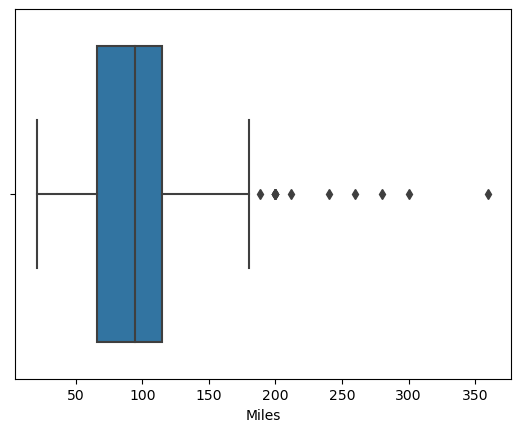

In [199]:
sns.boxplot(data=df, x="Miles")
plt.show()

In [200]:
df["Miles"].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

In [201]:
q1_miles = np.percentile(df["Miles"], 25)
q3_miles = np.percentile(df["Miles"], 75)

q1_miles, q3_miles

(66.0, 114.75)

In [202]:
# Interquartile range

iqr_miles = q3_miles - q1_miles
iqr_miles

48.75

In [203]:
# normal range

df["Miles"].max() - df["Miles"].min()

339

In [205]:
# There's huge difference b/w normal range and IQR.
# This is due the presence of outliers.

# Let's find them

In [206]:
# lower and upper limit of box plot

lower_lim_miles = q1_miles - 1.5 * iqr_miles
upper_lim_miles = q3_miles + 1.5 * iqr_miles

lower_lim_miles, upper_lim_miles

(-7.125, 187.875)

In [207]:
# Even though the miles column has only +ve values, we still ended up with lower limit being negative

# This could also suggest that the data distribution is right-skewed, 
# meaning there could be some extreme values on the higher end, but not on the lower end.

# This can be inferred from the boxplot graph as well.
# There are quite a few unique outliers on the higher limit side.

In [209]:
outliers_miles = df[df["Miles"] > upper_lim_miles]["Miles"].to_numpy()
outliers_miles

array([188, 212, 200, 200, 200, 240, 300, 280, 260, 200, 360, 200, 200])

In [210]:
len(outliers_miles)

13

In [219]:
len(set(outliers_miles))

8

In [220]:
# There are 13 outliers datapoints for Miles column
# 8 of them are unique values.

## Relation b/w age and product purchased

In [221]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,treadmill_cost
0,KP281,18,Male,14,Single,3,4,29562,112,1500
1,KP281,19,Male,15,Single,2,3,31836,75,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500
3,KP281,19,Male,12,Single,3,3,32973,85,1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500


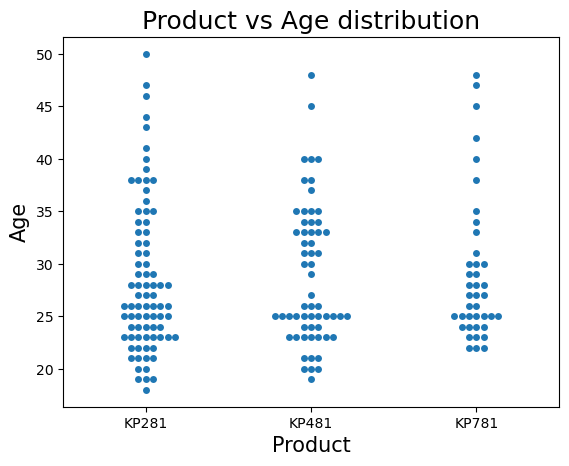

In [231]:
sns.swarmplot(x="Product", y="Age", data=df)

plt.title("Product vs Age distribution", fontsize=18)
plt.xlabel("Product", fontsize=15)
plt.ylabel("Age", fontsize=15)

plt.show()

In [232]:
# From the swarmplot it can be inferred that:
#     The younger age group prefers treadmill over any other age group.
#         This can also be inferred via mode function
#     Overall, age has almost no relation to the type of product the customer will buy.

In [241]:
df.groupby("Product")["Age"].apply(lambda x: x.mode()[0])

Product
KP281    23
KP481    25
KP781    25
Name: Age, dtype: int64

In [242]:
# From the above group by output:
#     Most of the customers are in the age group of mid 20s for each Product type purchase

# Probability analysis

### Gender

In [243]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,treadmill_cost
0,KP281,18,Male,14,Single,3,4,29562,112,1500
1,KP281,19,Male,15,Single,2,3,31836,75,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500
3,KP281,19,Male,12,Single,3,3,32973,85,1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500


In [250]:
df_gender_product_prob = pd.crosstab(index=df["Product"], columns=df["Gender"], 
                                     margins=True, margins_name="Total")/len(df)

In [251]:
df_gender_product_prob

Gender,Female,Male,Total
Product,,,
KP281,0.222222,0.222222,0.444444
KP481,0.161111,0.172222,0.333333
KP781,0.038889,0.183333,0.222222
Total,0.422222,0.577778,1.000000


In [253]:
df_gender_product_prob.columns.name = None

In [257]:
df_gender_product_prob.reset_index(inplace=True)

In [259]:
df_gender_product_prob

,Product,Female,Male,Total
0,KP281,0.222222,0.222222,0.444444
1,KP481,0.161111,0.172222,0.333333
2,KP781,0.038889,0.183333,0.222222
3,Total,0.422222,0.577778,1.000000


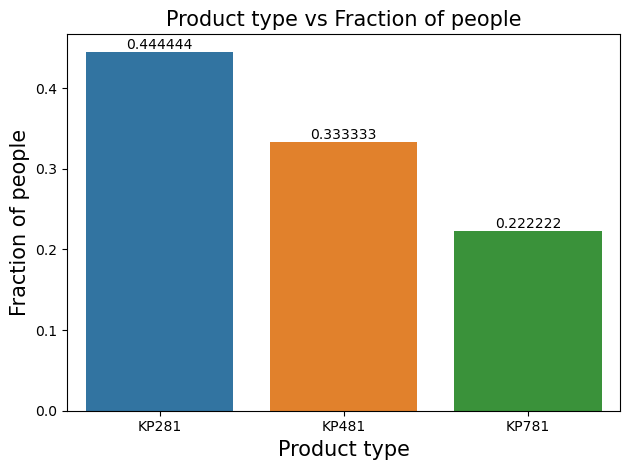

In [273]:
# visualising the above crosstab

ax = sns.barplot(data= df_gender_product_prob.loc[:2], x="Product", y="Total")

plt.title("Product type vs Fraction of people", fontsize=15)
plt.xlabel("Product type", fontsize=15)
plt.ylabel("Fraction of people", fontsize=15)

for i in ax.containers:
    ax.bar_label(i)

    
plt.tight_layout()
plt.show()

In [274]:
# Above plot shows the fraction of people buying each type of treadmill, irrespective of gender.
# The cheapest treadmill, i.e., KP281 is the most bought treadmill

# The crosstab `df_gender_product_prob` alos helps us understand the distribution gender wise as well.

In [279]:
# visualing for each gender

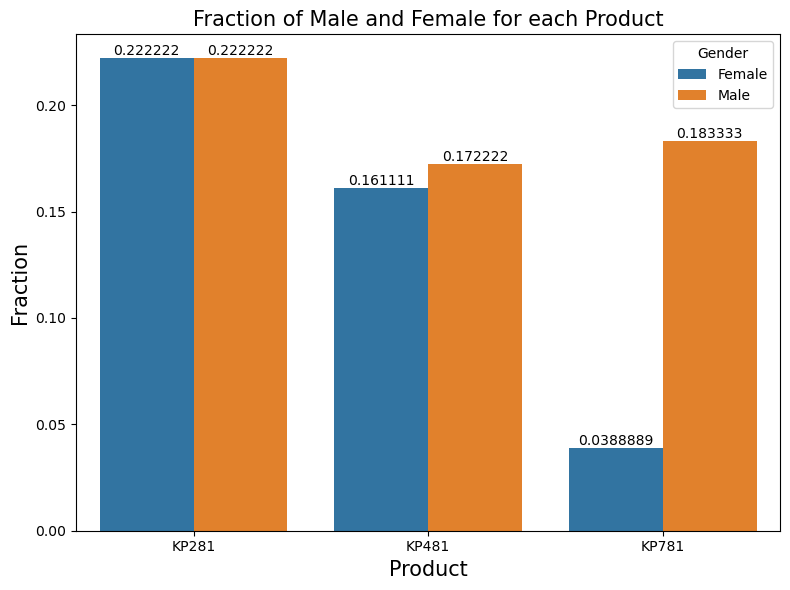

In [285]:
# Melt the DataFrame to long format
df_melted = pd.melt(df_gender_product_prob.iloc[0:-1, 0:-1], id_vars="Product", 
                    var_name="Gender", value_name="Proportion")

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_melted, x="Product", y="Proportion", hue="Gender")

ax.set_title("Fraction of Male and Female for each Product", fontsize=15)
ax.set_xlabel("Product", fontsize=15)
ax.set_ylabel("Fraction", fontsize=15)

for i in ax.containers:
    ax.bar_label(i)

plt.tight_layout()
plt.show()

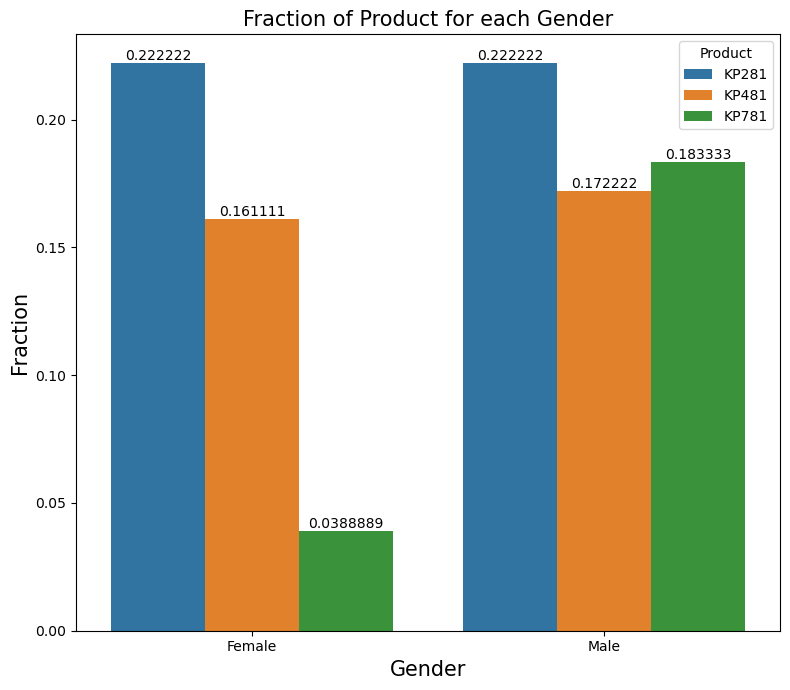

In [367]:
df_melted = pd.melt(df_gender_product_prob.iloc[0:-1, 0:-1], id_vars="Product", 
                    var_name="Gender", value_name="Proportion")

plt.figure(figsize=(8,7))
ax = sns.barplot(data=df_melted, x="Gender", y="Proportion", hue="Product")

ax.set_title("Fraction of Product for each Gender", fontsize=15)
ax.set_xlabel("Gender", fontsize=15)
ax.set_ylabel("Fraction", fontsize=15)

for i in ax.containers:
    ax.bar_label(i)

plt.tight_layout()
plt.show()

In [286]:
# the above plots gives a clear idea of what fraction of people (in each gender group)
# prefers what kind of treadmill

### Marital status

In [275]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,treadmill_cost
0,KP281,18,Male,14,Single,3,4,29562,112,1500
1,KP281,19,Male,15,Single,2,3,31836,75,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500
3,KP281,19,Male,12,Single,3,3,32973,85,1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500


In [276]:
df_maritalstatus_prodcuct_prob = pd.crosstab(index=df["Product"], 
                                             columns=df["MaritalStatus"], 
                                             margins=True, margins_name="Total")/len(df)
df_maritalstatus_prodcuct_prob

MaritalStatus,Partnered,Single,Total
Product,,,
KP281,0.266667,0.177778,0.444444
KP481,0.200000,0.133333,0.333333
KP781,0.127778,0.094444,0.222222
Total,0.594444,0.405556,1.000000


In [277]:
df_maritalstatus_prodcuct_prob.columns.name = None
df_maritalstatus_prodcuct_prob.reset_index(inplace=True)

In [278]:
df_maritalstatus_prodcuct_prob

,Product,Partnered,Single,Total
0,KP281,0.266667,0.177778,0.444444
1,KP481,0.200000,0.133333,0.333333
2,KP781,0.127778,0.094444,0.222222
3,Total,0.594444,0.405556,1.000000


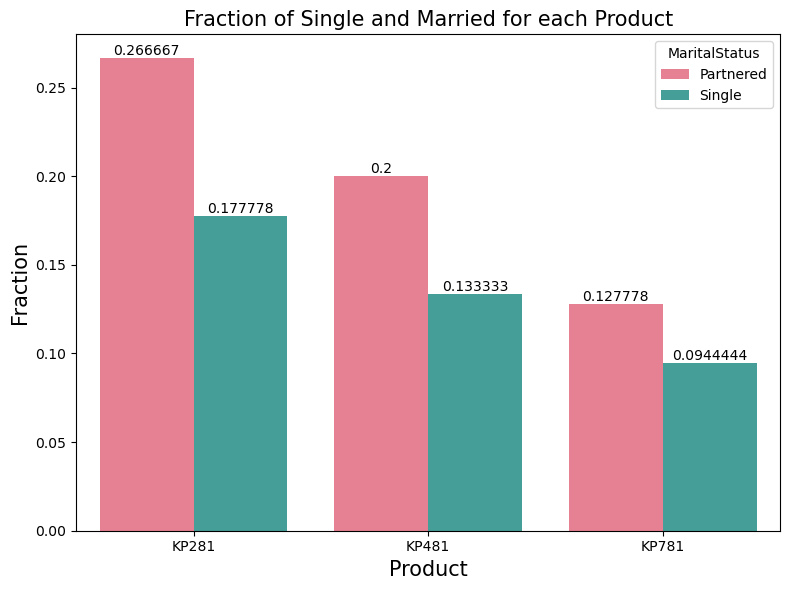

In [293]:
df_melted = pd.melt(df_maritalstatus_prodcuct_prob.iloc[0:-1, 0:-1], id_vars="Product", 
                    var_name="MaritalStatus", value_name="Fraction")

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_melted, x="Product", y="Fraction", hue="MaritalStatus", palette="husl")

ax.set_title("Fraction of Single and Married for each Product", fontsize=15)
ax.set_xlabel("Product", fontsize=15)
ax.set_ylabel("Fraction", fontsize=15)

for i in ax.containers:
    ax.bar_label(i)

plt.tight_layout()
plt.show()

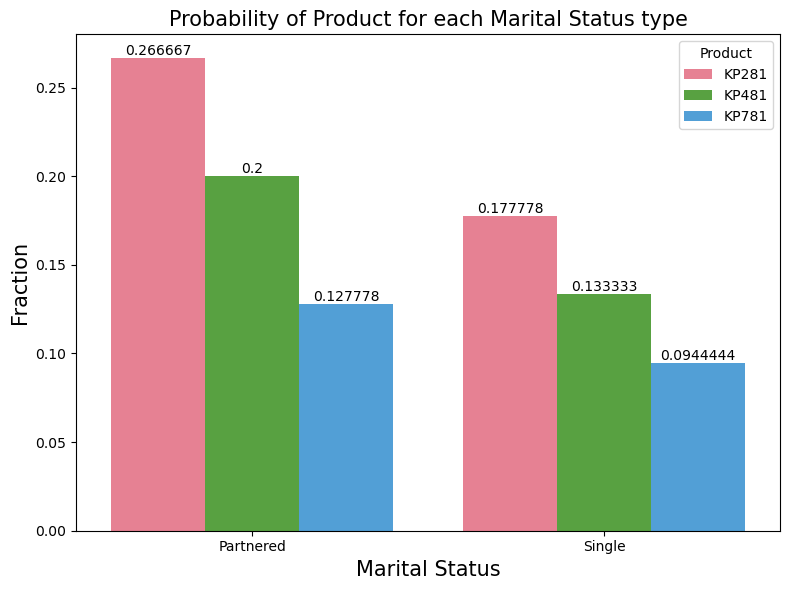

In [356]:
df_melted = pd.melt(df_maritalstatus_prodcuct_prob.iloc[0:-1, 0:-1], id_vars="Product", 
                    var_name="MaritalStatus", value_name="Fraction")

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_melted, x="MaritalStatus", y="Fraction", hue="Product", palette="husl")

ax.set_title("Probability of Product for each Marital Status type", fontsize=15)
ax.set_xlabel("Marital Status", fontsize=15)
ax.set_ylabel("Fraction", fontsize=15)

for i in ax.containers:
    ax.bar_label(i)

plt.tight_layout()
plt.show()

In [347]:
# Married people have higher probability of buying a treadmill over single ones
# irrespective of treadmill cost

# Also, irrespetive of marital status, KP281 is preferred more over other products

### Fitness

In [294]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,treadmill_cost
0,KP281,18,Male,14,Single,3,4,29562,112,1500
1,KP281,19,Male,15,Single,2,3,31836,75,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500
3,KP281,19,Male,12,Single,3,3,32973,85,1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500


In [296]:
df_fitness_product_prob = pd.crosstab(index=df["Product"], columns=df["Fitness"], 
                                      margins=True, margins_name="Total")/len(df)

In [298]:
df_fitness_product_prob

Fitness,1,2,3,4,5,Total
Product,,,,,,
KP281,0.005556,0.077778,0.300000,0.050000,0.011111,0.444444
KP481,0.005556,0.066667,0.216667,0.044444,0.000000,0.333333
KP781,0.000000,0.000000,0.022222,0.038889,0.161111,0.222222
Total,0.011111,0.144444,0.538889,0.133333,0.172222,1.000000


In [299]:
df_fitness_product_prob.columns.name= None
df_fitness_product_prob.reset_index(inplace=True)

df_fitness_product_prob

,Product,1,2,3,4,5,Total
0,KP281,0.005556,0.077778,0.300000,0.050000,0.011111,0.444444
1,KP481,0.005556,0.066667,0.216667,0.044444,0.000000,0.333333
2,KP781,0.000000,0.000000,0.022222,0.038889,0.161111,0.222222
3,Total,0.011111,0.144444,0.538889,0.133333,0.172222,1.000000


In [301]:
# This analysis has already been done earlier.
# That was considering the total count. This time we are analysing based on fractions and probability

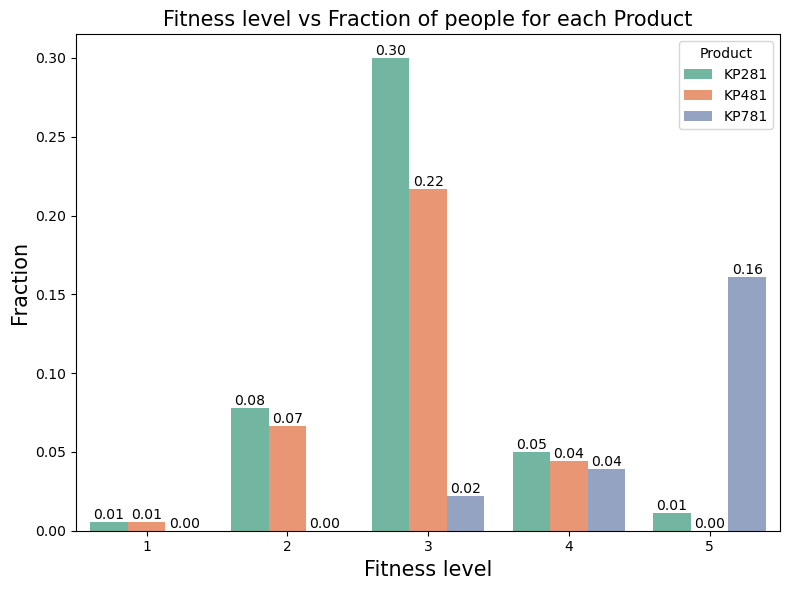

In [354]:
df_melted = pd.melt(df_fitness_product_prob.iloc[0:-1, 0:-1], id_vars="Product", 
                    var_name="Fitness", value_name="Fraction")

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_melted, x="Fitness", y="Fraction", hue="Product", palette="Set2")

ax.set_title("Fitness level vs Fraction of people for each Product", fontsize=15)
ax.set_xlabel("Fitness level", fontsize=15)
ax.set_ylabel("Fraction", fontsize=15)

for i in ax.containers:
    ax.bar_label(i, fmt="%.2f")

plt.tight_layout()
plt.show()

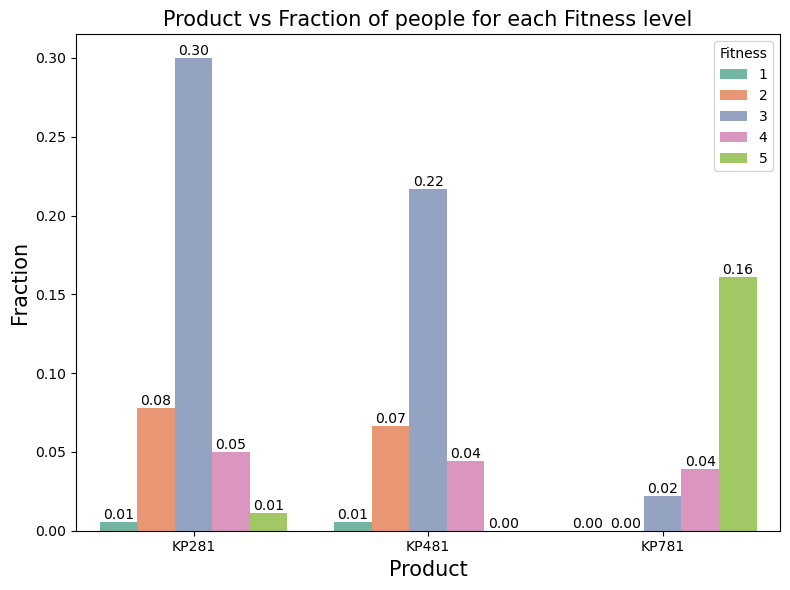

In [355]:
df_melted = pd.melt(df_fitness_product_prob.iloc[0:-1, 0:-1], id_vars="Product", 
                    var_name="Fitness", value_name="Fraction")

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_melted, x="Product", y="Fraction", hue="Fitness", palette="Set2")

ax.set_title("Product vs Fraction of people for each Fitness level", fontsize=15)
ax.set_xlabel("Product", fontsize=15)
ax.set_ylabel("Fraction", fontsize=15)

for i in ax.containers:
    ax.bar_label(i, fmt="%.2f")

plt.tight_layout()
plt.show()

In [348]:
# From the graph it can be inferred that:
#     The most fit people (level 5) choose to prefer more expensive treadmill. 
#     This could be due a psychological factor as well that costly the product better the quality it will have, 
#     hence better result

# People with moderate fitness, tend to choose cheaper treadmill more compared to expensive one:
#     Maybe they prioritise on maintaining their current fitness and the cheaper ones will do just fine.

# Or the other way of saying is:
#     For chaper treadmills, probability of finding someone of fitness level 3 is very high 
#     in comparison to other level

### Probability analysis conclusions

In [304]:
# Probability that a customer buys a KP481 given she is female
# see below:

In [305]:
df_gender_product_prob

,Product,Female,Male,Total
0,KP281,0.222222,0.222222,0.444444
1,KP481,0.161111,0.172222,0.333333
2,KP781,0.038889,0.183333,0.222222
3,Total,0.422222,0.577778,1.000000


In [313]:
df_gender_product_prob[df_gender_product_prob["Product"] == "KP481"]["Female"].iloc[0]

0.16111111111111112

In [314]:
# Probability that a customer buys a KP781 given they are married
# see below:

In [315]:
df_maritalstatus_prodcuct_prob

,Product,Partnered,Single,Total
0,KP281,0.266667,0.177778,0.444444
1,KP481,0.200000,0.133333,0.333333
2,KP781,0.127778,0.094444,0.222222
3,Total,0.594444,0.405556,1.000000


In [316]:
df_maritalstatus_prodcuct_prob[df_maritalstatus_prodcuct_prob["Product"] == "KP781"]["Partnered"].iloc[0]

0.12777777777777777

In [317]:
# Probability that a customer buys a KP281 given that they are of fitness level 2
# see below:

In [318]:
df_fitness_product_prob

,Product,1,2,3,4,5,Total
0,KP281,0.005556,0.077778,0.300000,0.050000,0.011111,0.444444
1,KP481,0.005556,0.066667,0.216667,0.044444,0.000000,0.333333
2,KP781,0.000000,0.000000,0.022222,0.038889,0.161111,0.222222
3,Total,0.011111,0.144444,0.538889,0.133333,0.172222,1.000000


In [322]:
df_fitness_product_prob[df_fitness_product_prob["Product"] == "KP281"][2].iloc[0]

0.07777777777777778

In [323]:
# Above are few of the observations that can be made using cross-tab tables created.
# Thus, using cross tab it is easy to quickly calculate the conditional probability
#     with a single glance without re-calculating everything again from the scratch.

# Correlation matrix & Heatmap

In [324]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,treadmill_cost
0,KP281,18,Male,14,Single,3,4,29562,112,1500
1,KP281,19,Male,15,Single,2,3,31836,75,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500
3,KP281,19,Male,12,Single,3,3,32973,85,1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500


In [325]:
df.shape

(180, 10)

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product         180 non-null    object
 1   Age             180 non-null    int64 
 2   Gender          180 non-null    object
 3   Education       180 non-null    int64 
 4   MaritalStatus   180 non-null    object
 5   Usage           180 non-null    int64 
 6   Fitness         180 non-null    int64 
 7   Income          180 non-null    int64 
 8   Miles           180 non-null    int64 
 9   treadmill_cost  180 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 14.2+ KB


In [329]:
# Creating a dataframe including only those columns which have numeric data types

df_numeric = df.select_dtypes(include="int64")

In [330]:
df_numeric.head()

,Age,Education,Usage,Fitness,Income,Miles,treadmill_cost
0,18,14,3,4,29562,112,1500
1,19,15,2,3,31836,75,1500
2,19,14,4,3,30699,66,1500
3,19,12,3,3,32973,85,1500
4,20,13,4,2,35247,47,1500


In [331]:
df_numeric.shape

(180, 7)

In [336]:
# correlation matrix of numeric columns dataframe: df_numeric

corr_matrix = df_numeric.corr()
corr_matrix

,Age,Education,Usage,Fitness,Income,Miles,treadmill_cost
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618,0.029263
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284,0.563463
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130,0.623124
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702,0.696616
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473,0.695847
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000,0.643923
treadmill_cost,0.029263,0.563463,0.623124,0.696616,0.695847,0.643923,1.000000


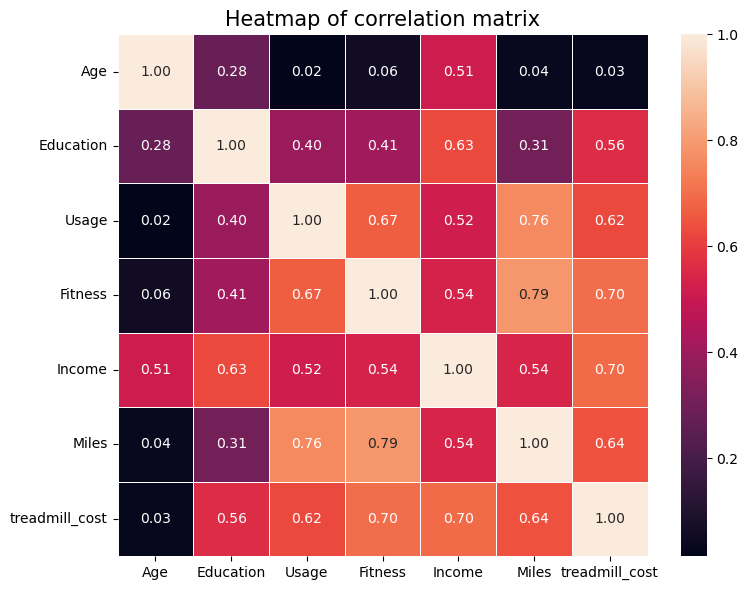

In [341]:
# creating a heatmap of the correlation matrix for better visualisation

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5)

plt.title("Heatmap of correlation matrix", fontsize=15)

plt.tight_layout()
plt.show()

### Observations from the heatmap

In [344]:
# Strong correlation:

# 1. The more fit the person is, the more likely he/she will be using the treadmill.
#     Which also translates to covering more miles over the treadmill

# 2. Highly fit customers tend to opt for more expensive treadmill

# 3. If a customer has high income, they are likely to opt for more expensive treadmill.

# 4. People who use treadmill more tend to cover more miles, which is intutive.

In [345]:
# Moderate correlation

# 1. More educated people tend to have higher income. Although not a rule, but this is expected.

# 2. More expensive treadmills are likely to be used more frequently

In [346]:
# Overall correlation

# Age has almost no influence on any of the factors in the dataset, besides income.
# Which could be mostly due to increased experience with age, hence increase in income

# People with more education tend to have higher income, 
# thus they are more likely to buy more expensive treadmill, 
# which further are more likely to be used most often.

# Customer profiling & Recommendations

## Product: KP281

In [349]:
# People with relatively less income and less fitness value opt for KP281 treadmill
# Age has negligible effect on the treadmill choice
# Both male and female equally incline towards KP281, so gender has no effect on the choice.
# Married people have a higher chance of picking this over single individuals

# Being the cheapest treadmill, this behaviour is expected.
# As people with less income won't go for expensive one and 
#     less fit people don't want to invest in expensive product during the early phase of their fitness cycle.
# Also being cheapest one, it will equally attaract general population both male & female, relatively same

## Product: KP481

In [350]:
# People with moderate to less fitness value may opt for this treadmill 
# Age has negligible effect on the treadmill choice
# Females are slightly more likely to buy this product over males.
# Married people have a higher chance of picking this over single individuals

# Besides difference in gender, there is not much significant difference between KP481 and KP281.
# This could be due to only a small difference of price between the products.
# As the KP481 is not much expensive than KP281, it creates a psychological illusion that 
# the product might not make significant difference in the improvement of an individual's fitness.
# Thus it's better not to invest in this and just go with the cheaper one -> as it will also get the job done.

# This kind of tread is very common in customers when an organisation provides the same product
# with different price brackets with only small differences in features.
# This is usually done to push customers towards more expensive product -> better for business.

# Comparing this to Apple iphones...
# Apple also releases multiple iphone models with price differences b/w of about $100 - $150.
# This pushes the customers who were earlier thinking of buying middle price iphone 
# to simply go for the more expensive one.
#     Thus, more sale for expensive models -> higher profit -> good for business

# Aerofit could also have released the KP481 model as a filler model b/w the other two.
# Making it easier for the company to attract customers towards the most expensive product of their's
# Hence, more profit - great business!

## Product: KP781

In [351]:
# People with relatively more income and more fitness value opt for KP781 treadmill.
# Age has negligible effect on the treadmill choice
# Females are significantly more likely to buy this treadmill.
#     Female to male ratio is very high for KP781 treadmill than the other treadmills
# Married people have a higher chance of picking this over single individuals.

# Being the most expensive treadmill, this behaviour is expected.
# People with more income will go for this product as they can afford it with relative ease.
#     Also comes the phsycological factor that more expensive the product is the better the quality
#     and people with higher income can afford higher quality product.
# Also, more fit people have strong mentality of health and fintess 
#     They tend to invest in good quality products/equipments that could aid their fitness and improve if required.
#     Expensive products usually have more extra or advance features
#     which could also be tailored according to individual's needs - hence, the prefernce

## Recommendations…

### Creating few user profiles:

In [368]:
# Customer 1: 
#     Male, 
#     28 years, 
#     fitness = 4, 
#     education = 12, 
#     single, 
#     income = 50000

# Customer 2:
#     Female,
#     35 years,
#     fitness = 2,
#     education = 18
#     partnered,
#     income = 60000

# Customer 3:
#     Female,
#     27 years,
#     fitness = 4,
#     education = 10,
#     single,
#     income = 58000

#### Customer 1

In [369]:
# Best product for customer 1 is
# KP481

# Explanation:
#     Men have more chance of buying treadmill in order: KP281 > KP781 > KP481
#     Fitness level is high so probably more expensive one.
#     But education & income falls under the category of KP281 & KP481 (rulling out KP781)
#         50000 is at lower edge in income group for KP781 customers, thus rulling it out
#     People buy KP281 more than KP481, in general
#     Preferring more on fitness factor as it has strong correlation with the product.
#     Hence KP481.

#### Customer 2

In [370]:
# Best product for customer 2 is
# KP281

# Explanation:
#     Women have more chance of buying treadmill in order: KP281 > KP481 >> KP781 (very less chance for KP781)
#     Low fitness means cheaper treadmill (rulling out KP781)
#     Education & Income is not much help as it can help her buy either of the products
#     People buy KP281 > KP481 (in general)
#     Preferring more on fitness factor as it has strong correlation with the product.
#     Hence KP281

#### Customer 3

In [371]:
# Best product for customer 3 is
# KP781

# Explanation:
#     Women have more chance of buying treadmill in order: KP281 > KP481 >> KP781 (very less chance for KP781)
#     But high fitness tend to incliner her more towards KP781
#     Income will make it easy for to afford either of the products
#     People buy KP281 > KP481 > KP781
#     Preferring more on fitness factor as it has strong correlation with the product.
#         and also income is indicating towards more expensive product
#     Hence KP781